In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
import pandas as pd
loc="loansmall.csv"
df=pd.read_csv(loc)
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(194111, 74)

In [5]:
df.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

# List of Columns & NA counts where NA values are more than 30%

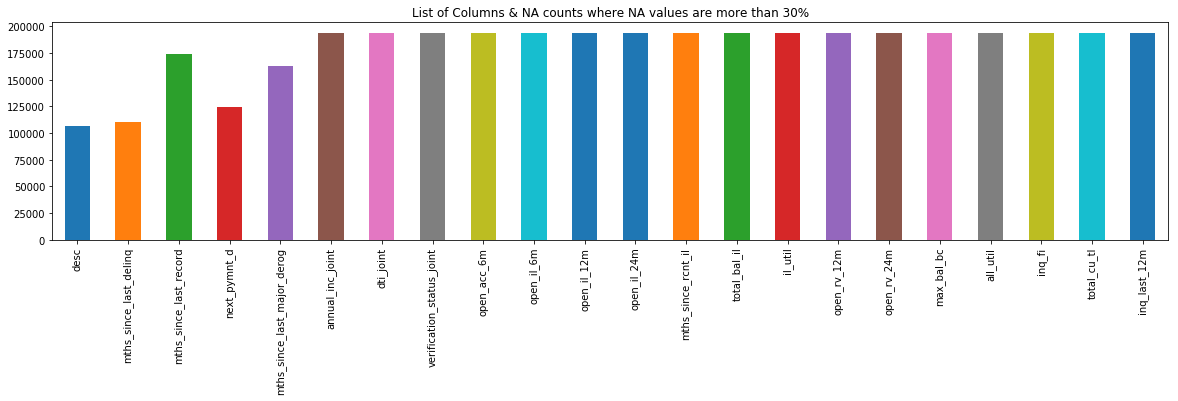

In [6]:
NA_col=df.isnull().sum()
NA_col=NA_col[NA_col.values>(0.3*len(df))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [7]:
### Drop rows with missing data
df_no_missing = df.dropna()
df_no_missing

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [8]:
### Drop completely empty columns
df.dropna(axis=1, how ="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,A4,...,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,C5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,E1,...,NaN,Dec-14,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,...,NaN,Aug-12,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,B5,...,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [9]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df


In [10]:
df= removeNulls(df, axis =1,percent = 0.3)

Number of Columns dropped	:  22

Old dataset rows,columns (194111, 74) 
New dataset rows,columns (194111, 52)


# Remove rows where NA values are more than or equal to 30%

In [11]:
df = removeNulls(df, axis =0,percent = 0.3)


Number of Rows dropped	:  0

Old dataset rows,columns (194111, 52) 
New dataset rows,columns (194111, 52)


# Employment Term : Remove 'n/a' value with 'self-employed'.
#There are some values in emp_term which are 'n/a', we assume that are 'self-employed'. Because for 'self-employed' applicants, emp-lenth is 'Not Applicable'

In [12]:
import numpy as np
df['selfemployed'] = np.where(df['emp_length']=='nan', 'yes', 'no')
df.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,selfemployed
194101,1578752,1847715,15350,15350,15350.0,36 months,14.09,525.30,B,B5,...,8580.07,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,133814.0,7100.0,no
194102,1578735,1847500,6000,6000,6000.0,36 months,16.29,211.81,C,C4,...,3409.08,May-14,0.0,1,INDIVIDUAL,0.0,0.0,204046.0,30462.0,no
194103,1578534,1847676,5500,5500,5500.0,36 months,12.12,183.00,B,B3,...,5556.07,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,210325.0,29300.0,no
194104,1578522,1847663,30000,30000,29750.0,36 months,18.75,1095.90,D,D3,...,25796.92,Jul-13,0.0,1,INDIVIDUAL,0.0,0.0,50098.0,41400.0,no
194105,1578517,1847658,3400,3400,3400.0,36 months,6.03,103.49,A,A1,...,26.82,Dec-13,0.0,1,INDIVIDUAL,0.0,0.0,31241.0,10700.0,no
194106,1578738,1783058,8000,8000,8000.0,36 months,15.31,278.54,C,C2,...,279.37,Oct-15,0.0,1,INDIVIDUAL,0.0,0.0,72104.0,15000.0,no
194107,1572131,1840206,12350,12350,12350.0,36 months,6.62,379.20,A,A2,...,3357.99,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,492599.0,65000.0,no
194108,1573779,1841705,19700,19700,19450.0,36 months,14.09,674.17,B,B5,...,686.51,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,176907.0,26700.0,no
194109,1570647,1838247,15875,15875,15625.0,36 months,14.09,543.27,B,B5,...,7527.37,Aug-14,0.0,1,INDIVIDUAL,0.0,0.0,169426.0,11400.0,no
194110,1578497,1847637,12500,12500,12500.0,36 months,15.80,438.23,C,C3,...,441.08,Oct-15,0.0,1,INDIVIDUAL,0.0,0.0,25659.0,4200.0,no


In [13]:
df["selfemployed"].value_counts()

no    194111
Name: selfemployed, dtype: int64

In [14]:
not_required_columns = ["id","url",'emp_title', 'policy_code', 'last_pymnt_d', 'earliest_cr_line']
df.drop(labels = not_required_columns, axis =1, inplace=True)
print("So now we are left with",df.shape ,"rows & columns.")

So now we are left with (194111, 47) rows & columns.


In [15]:
def loan_status_to_numeric(x):
    if x=='Charged Off':
        return 0
    if x=='Current':
        return 1
    if x=='Default':
        return 2
    if x=='Does not meet the credit policy. Status:Charged Off':
        return 3
    if x=='Does not meet the credit policy. Status:Fully Paid':
        return 4
    if x=='Fully Paid':
        return 5
    if x=='In Grace Period':
        return 6
    if x=='Late (16-30 days)':
        return 7
    if x=='Late (31-120 days)':
        return 8

def verification_to_numeric(x):
    if x=='Not Verified':
        return 0
    if x=='Source Verified':
        return 1
    if x=='Verified':
        return 2

def ownership_to_numeric(x):
    if x=='NONE':
        return 0
    if x=='RENT':
        return 1
    if x=='OWN':
        return 2
    if x=='MORTGAGE':
        return 3
    if x=='OTHER':
        return 4
def grade_to_numeric(x):
    if x == 'A' :
        return  1
    if x == 'B' :
        return  2
    if x == 'C' :
        return  3
    if x == 'D' :
        return  4
    if x == 'E' :
        return  5
    if x == 'F' :
        return  6
    if x == 'G' :
        return  7

df['loan_status_num'] = df['loan_status'].apply(loan_status_to_numeric)
df['verification_num'] = df['verification_status'].apply(verification_to_numeric)
df['ownership_num'] = df['home_ownership'].apply(ownership_to_numeric)
df['grade_cd'] = df['grade'].apply(grade_to_numeric)
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,selfemployed,loan_status_num,verification_num,ownership_num,grade_cd
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,INDIVIDUAL,0.0,NaN,NaN,NaN,no,5,2,1,2
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,INDIVIDUAL,0.0,NaN,NaN,NaN,no,0,1,1,3
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,INDIVIDUAL,0.0,NaN,NaN,NaN,no,5,0,1,3
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,INDIVIDUAL,0.0,NaN,NaN,NaN,no,5,1,1,3
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,INDIVIDUAL,0.0,NaN,NaN,NaN,no,1,1,1,2


In [16]:
df2=df[['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate',"grade_cd",'sub_grade','ownership_num','verification_num',"loan_status_num",'emp_length',"last_credit_pull_d","application_type",'tot_cur_bal','annual_inc','dti','term']]
df2.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,grade_cd,sub_grade,ownership_num,verification_num,loan_status_num,emp_length,last_credit_pull_d,application_type,tot_cur_bal,annual_inc,dti,term
0,5000,5000,4975.0,162.87,10.65,2,B2,1,2,5,10+ years,Jan-16,INDIVIDUAL,NaN,24000.0,27.65,36 months
1,2500,2500,2500.0,59.83,15.27,3,C4,1,1,0,< 1 year,Sep-13,INDIVIDUAL,NaN,30000.0,1.00,60 months
2,2400,2400,2400.0,84.33,15.96,3,C5,1,0,5,10+ years,Jan-16,INDIVIDUAL,NaN,12252.0,8.72,36 months
3,10000,10000,10000.0,339.31,13.49,3,C1,1,1,5,10+ years,Jan-15,INDIVIDUAL,NaN,49200.0,20.00,36 months
4,3000,3000,3000.0,67.79,12.69,2,B5,1,1,1,1 year,Jan-16,INDIVIDUAL,NaN,80000.0,17.94,60 months


In [17]:
df2.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,grade_cd,ownership_num,verification_num,loan_status_num,tot_cur_bal,annual_inc,dti
loan_amnt,1.000000,0.996551,0.986320,0.950588,0.193517,0.168232,0.203829,0.398291,-0.102253,0.313434,0.336186,0.083704
funded_amnt,0.996551,1.000000,0.990482,0.955838,0.195963,0.167414,0.203292,0.397821,-0.104738,0.313428,0.334738,0.086470
funded_amnt_inv,0.986320,0.990482,1.000000,0.945451,0.199897,0.158557,0.202992,0.404168,-0.109271,0.313354,0.329014,0.094204
installment,0.950588,0.955838,0.945451,1.000000,0.179737,0.147716,0.165566,0.344864,-0.072725,0.277573,0.335329,0.085001
int_rate,0.193517,0.195963,0.199897,0.179737,1.000000,0.937344,-0.105743,0.217489,-0.164752,-0.145498,-0.022616,0.179751
grade_cd,0.168232,0.167414,0.158557,0.147716,0.937344,1.000000,-0.107602,0.182111,-0.128824,-0.130188,-0.014102,0.130124
ownership_num,0.203829,0.203292,0.202992,0.165566,-0.105743,-0.107602,1.000000,0.143836,-0.009647,0.524828,0.183135,0.011719
verification_num,0.398291,0.397821,0.404168,0.344864,0.217489,0.182111,0.143836,1.000000,-0.100024,0.193836,0.113602,0.192542
loan_status_num,-0.102253,-0.104738,-0.109271,-0.072725,-0.164752,-0.128824,-0.009647,-0.100024,1.000000,0.027917,0.026842,-0.118440
tot_cur_bal,0.313434,0.313428,0.313354,0.277573,-0.145498,-0.130188,0.524828,0.193836,0.027917,1.000000,0.488271,-0.017928


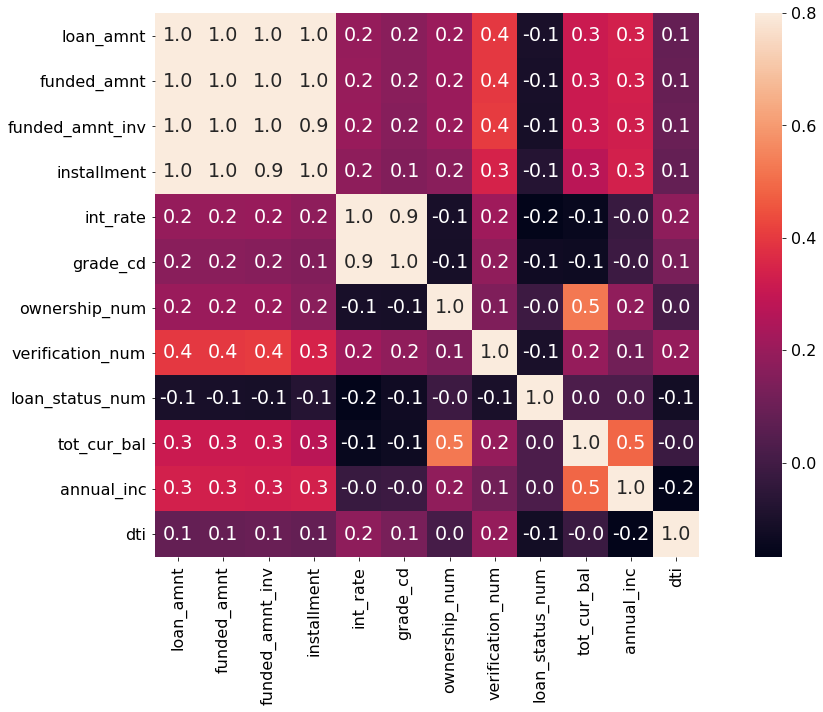

In [18]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
sns.heatmap(df2.corr(), vmax=.8, square=True, annot=True, fmt='.1f')


# LOAN AMOUNT

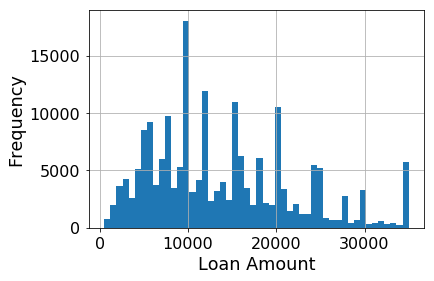

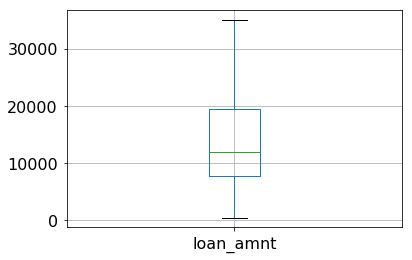

In [19]:
df['loan_amnt'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
q = df.boxplot(column='loan_amnt')

In [20]:
(df.loan_status.value_counts()*100)/len(df)

Fully Paid                                             52.335004
Current                                                32.707059
Charged Off                                            11.713401
Does not meet the credit policy. Status:Fully Paid      1.024156
Late (31-120 days)                                      1.008701
In Grace Period                                         0.536291
Does not meet the credit policy. Status:Charged Off     0.392044
Late (16-30 days)                                       0.177218
Default                                                 0.106125
Name: loan_status, dtype: float64

Text(0,0.5,'Relationship between Loan Amount and Loan status')

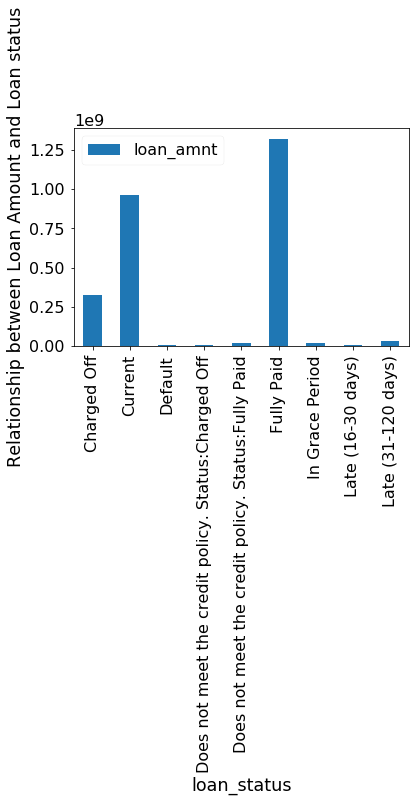

In [21]:
pd.pivot_table(df, index= 'loan_status', values= "loan_amnt",aggfunc="sum").plot(kind= 'bar')
plt.ylabel("Relationship between Loan Amount and Loan status")

In [22]:
(df.purpose.value_counts()*100)/len(df)

debt_consolidation    57.024589
credit_card           21.514494
home_improvement       5.859534
other                  5.697771
major_purchase         2.548027
small_business         1.878822
car                    1.461020
medical                0.942760
wedding                0.904122
moving                 0.702691
house                  0.610475
vacation               0.545564
educational            0.217401
renewable_energy       0.092730
Name: purpose, dtype: float64

In [ ]:
pd.pivot_table(df, index= 'purpose', values= "loan_amnt",aggfunc="sum").plot(kind= 'bar')
plt.ylabel("Distributin of Loan Amount over Purpose")

# Interest rate by Grade/subgarde

In [23]:
pd.pivot_table(df, index ='grade', values="int_rate")

,int_rate
grade,
A,7.607301
B,11.694546
C,15.192287
D,18.038264
E,20.606682
F,22.932610
G,23.684820


In [24]:
pd.pivot_table(df, index =['grade','sub_grade'], values="int_rate")

int_rate
grade sub_grade           
A     A1          5.968669
      A2          6.571439
      A3          7.468032
      A4          7.846809
      A5          8.728233
B     B1          9.943961
      B2         10.908760
      B3         11.766874
      B4         12.635944
      B5         13.155985
C     C1         13.883487
      C2         14.638029
      C3         15.253588
      C4         15.830881
      C5         16.663826
D     D1         17.240096
      D2         17.641168
      D3         18.057134
      D4         18.568533
      D5         19.201768
E     E1         19.497680
      E2         20.255526
      E3         20.691975
      E4         21.339125
      E5         21.742557
F     F1         22.279479
      F2         22.685927
      F3         23.227033
      F4         23.448580
      F5         23.729368
G     G1         23.886917
      G2         23.905845
      G3         24.054922
      G4         22.992222
      G5         22.795786

Text(0,0.5,'int_rate')

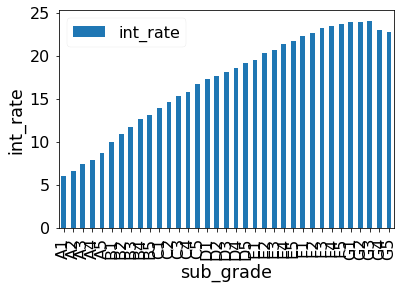

In [25]:
pd.pivot_table(df, index =["sub_grade"], values="int_rate").plot(kind= 'bar')
plt.ylabel("int_rate")

Text(0,0.5,'int_rate/term')

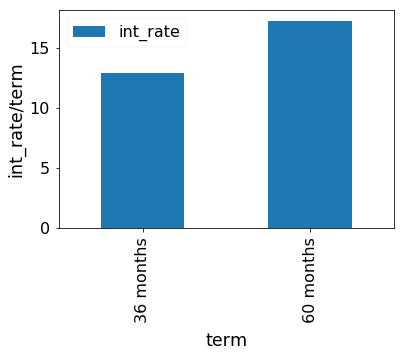

In [26]:
pd.pivot_table(df, index =["term"], values="int_rate").plot(kind= 'bar')
plt.ylabel("int_rate/term")

# annual income by Grade/subgarde 

In [29]:
pd.pivot_table(df, index =['grade',"sub_grade"], values="annual_inc")

annual_inc
grade sub_grade               
A     A1          86216.244290
      A2          80289.538036
      A3          81826.359432
      A4          77545.587619
      A5          81083.237737
B     B1          71969.074247
      B2          73522.765156
      B3          70921.712890
      B4          70340.770663
      B5          66413.133237
C     C1          68596.156720
      C2          68627.057642
      C3          68928.410534
      C4          69326.484466
      C5          70245.940652
D     D1          68155.717772
      D2          66366.829249
      D3          66320.370321
      D4          69067.219144
      D5          72321.086446
E     E1          73122.307219
      E2          76609.392230
      E3          74687.553634
      E4          77459.306722
      E5          80385.888052
F     F1          75944.496312
      F2          77536.973287
      F3          76593.170252
      F4          79183.257533
      F5          89328.640000
G     G1          87438.449655
      G2          92606.056676
      G3          97775.004070
      G4         101606.225132
      G5         101385.256604

Text(0,0.5,'annual_inc')

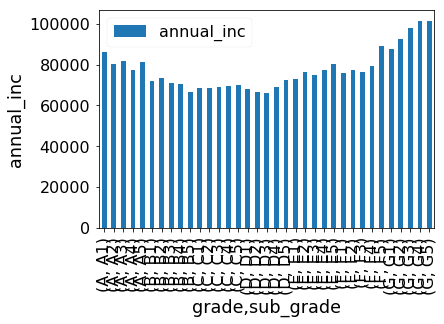

In [30]:
pd.pivot_table(df, index =['grade',"sub_grade"], values="annual_inc").plot(kind="bar")
plt.ylabel("annual_inc")

# grade by term

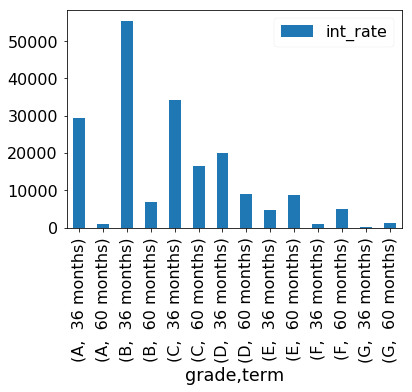

In [31]:
pd.pivot_table(df, index =['grade',"term"], values="int_rate", aggfunc="count").plot(kind='bar')

In [32]:
import pandas as pd
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=slot)
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,selfemployed,loan_status_num,verification_num,ownership_num,grade_cd,loan_amnt_range
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.0,NaN,NaN,NaN,no,5,2,1,2,0-5000
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,0.0,NaN,NaN,NaN,no,0,1,1,3,0-5000
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.0,NaN,NaN,NaN,no,5,0,1,3,0-5000
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,0.0,NaN,NaN,NaN,no,5,1,1,3,5000-10000
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,...,0.0,NaN,NaN,NaN,no,1,1,1,2,0-5000


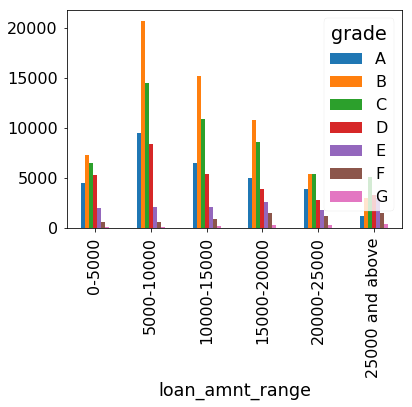

In [33]:
df.groupby(['loan_amnt_range','grade']).size().unstack().plot(kind='bar')


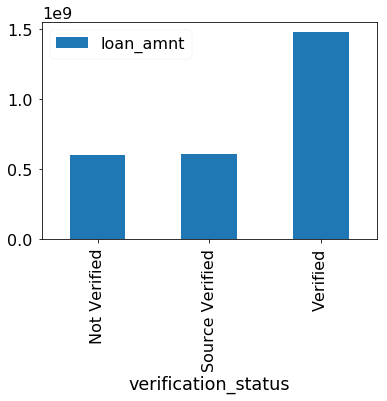

In [34]:
pd.pivot_table(df, index= 'verification_status', values="loan_amnt",aggfunc="sum").plot(kind='bar')

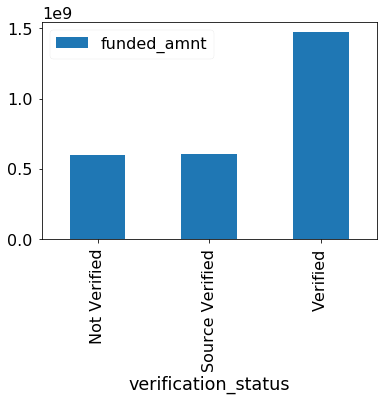

In [35]:
pd.pivot_table(df, index= 'verification_status', values="funded_amnt",aggfunc="sum").plot(kind='bar')

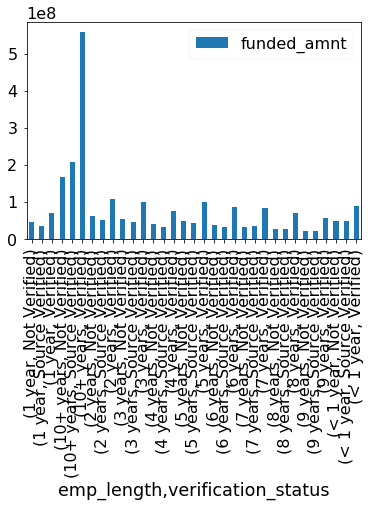

In [36]:
pd.pivot_table(df, index= ['emp_length',"verification_status"], values="funded_amnt",aggfunc="sum").plot(kind='bar')

# state wise loan distribution for different purpose

In [53]:
pd.pivot_table(df, index= ['addr_state'], columns='purpose', values = "funded_amnt",aggfunc="count", fill_value= 0,
              margins = True, margins_name= 'Total count')

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Total count
addr_state,,,,,,,,,,,,,,,
AK,4,114,324,0,28,3,16,5,3,30,0,13,8,2,550
AL,32,463,1385,4,177,14,76,18,9,136,3,44,6,14,2381
AR,31,303,762,3,88,3,48,19,2,88,1,21,6,6,1381
AZ,76,921,2479,8,276,28,113,52,38,227,5,92,14,30,4359
CA,452,6888,18200,57,1541,201,745,327,257,1859,36,618,242,308,31731
CO,63,975,2384,12,205,26,85,44,34,179,4,82,8,24,4125
CT,48,627,1748,7,204,17,106,25,24,208,4,49,15,31,3113
DC,5,144,375,0,24,5,21,4,8,41,0,13,10,11,661
DE,11,113,280,0,48,1,13,1,4,31,0,12,3,9,526


# Employment Length vs Loan Amount for different pupose of Loan

In [37]:
# Visualizing the pivot table using plot()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# use Seaborn styles
sns.set()

In [38]:
loanstatus=df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=df.loc[df['loan_status']=='Charged Off']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


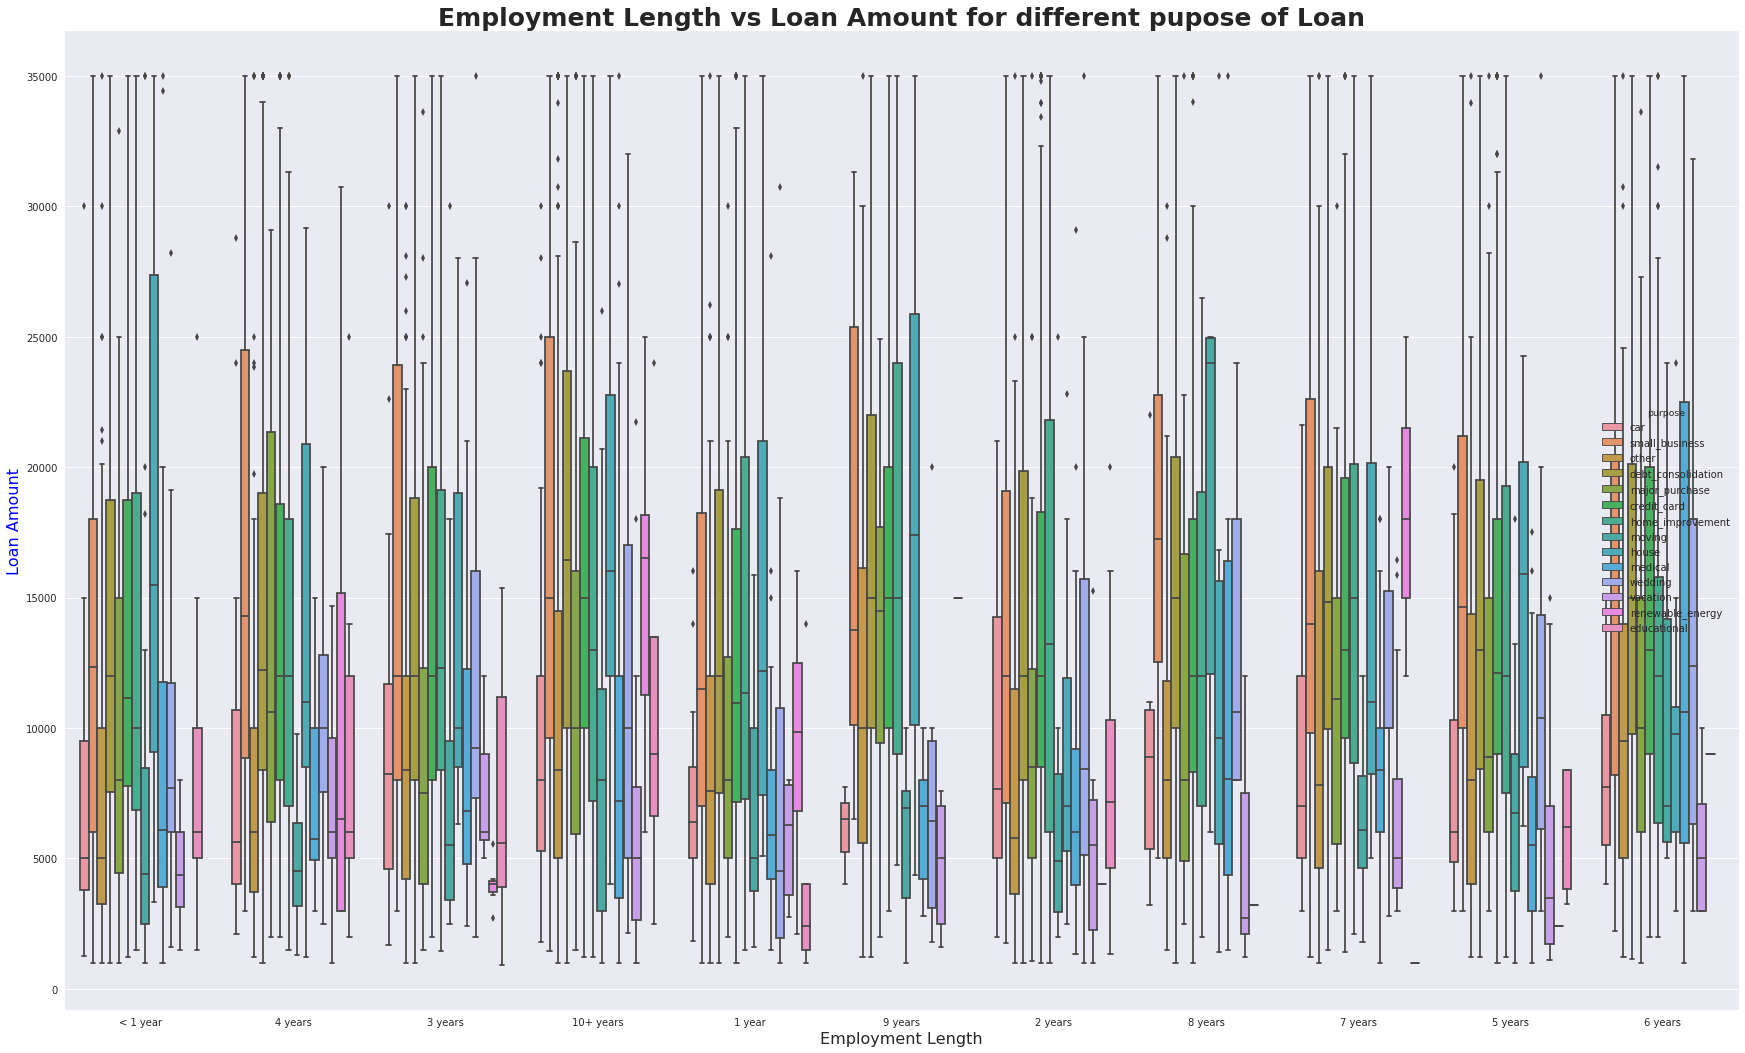

In [39]:
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=25,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()